## Загрузка и подготовка данных

Импортируем все необходимые нам библиотеки:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

В переменную `data_region_1` сохраним таблицу по 1 региону:

In [4]:
data_region_1=pd.read_csv('_')
data_region_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


В переменную `data_region_2` сохраним таблицу по 2 региону:

In [3]:
data_region_2=pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
data_region_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


В переменную `data_region_3` сохраним таблицу по 3 региону:

In [2]:
data_region_3=pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')
data_region_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Согласно документации столбы обозначают:

* `id` — уникальный идентификатор скважины
* `f0, f1, f2` — три признака точек
* `product` — объём запасов в скважине 

Посмотрим на общую информацию по трем таблицам:

In [5]:
data_region_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
data_region_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
data_region_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


**Вывод**

Данные не требуют какую-либо предподготовку.

## Обучение и проверка модели

Так как мы будем работать с тремя таблицами сразу, я сделаю функции для упрощения исследования.

Создадим функцию для разбмения данных:

In [10]:
def spli(data):
    features=data[['f0','f1','f2']]
    target=data['product']
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)
    return features_train, features_valid, target_train, target_valid, features, target

Теперь создадим функцию, которая будет возвращать таблицу с четырьмя метриками : `RMSE`,`MAE`,`R2` и `среднее значение`

In [11]:
def metrics(data_1,data_2,data_3,mod):
    features_train_1, features_valid_1, target_train_1, target_valid_1,features_1,target_1=spli(data_1)
    features_train_2, features_valid_2, target_train_2, target_valid_2,features_2,target_2=spli(data_2)
    features_train_3, features_valid_3, target_train_3, target_valid_3,features_3,target_3=spli(data_3)
    model_1,predicted_valid_1=mod(data_1)
    model_2,predicted_valid_2=mod(data_2)   
    model_3,predicted_valid_3=mod(data_3)
    RMSE_1=(mean_squared_error(target_valid_1, predicted_valid_1))**0.5
    RMSE_2=(mean_squared_error(target_valid_2, predicted_valid_2))**0.5
    RMSE_3=(mean_squared_error(target_valid_3, predicted_valid_3))**0.5
    MAE_1=mean_absolute_error(target_valid_1, predicted_valid_1)
    MAE_2=mean_absolute_error(target_valid_2, predicted_valid_2)
    MAE_3=mean_absolute_error(target_valid_3, predicted_valid_3)
    R2_1=model_1.score(features_valid_1, target_valid_1)
    R2_2=model_2.score(features_valid_2, target_valid_2)
    R2_3=model_3.score(features_valid_3, target_valid_3)
    mean_1=data_1['product'].mean()
    mean_2=data_2['product'].mean()
    mean_3=data_3['product'].mean()
    df=pd.DataFrame({'region_1' : [RMSE_1,MAE_1,R2_1,mean_1],
                     'region_2': [RMSE_2,MAE_2,R2_2,mean_2],
                    'region_3': [RMSE_3,MAE_3,R2_3,mean_3]},index=['RMSE','MAE','R2','среднее значение'])
    return df

###  Линейная регрессия 

Рассмотрим модель линейной регрессии для наших таблиц.

Создадим функцию для линейной регрессии:

In [12]:
def liner_reg(data):
    features_train, features_valid, target_train, target_valid,features,target=spli(data)
    model=LinearRegression()
    model.fit(features_train,target_train)
    predicted_valid=model.predict(features_valid)
    return model,predicted_valid

Выведим таблицу со всеми метриками:

In [13]:
metrics(data_region_1,data_region_2,data_region_3,liner_reg)

,region_1,region_2,region_3
RMSE,37.579422,0.893099,40.029709
MAE,30.919601,0.718766,32.792652
R2,0.279943,0.999623,0.205248
среднее значение,92.500000,68.825000,95.000000


**Вывод**

Наилучшие метрики у 2-го региона. Смущает коэффициент детерминациии(практически 1). Модель практически идеально предсказывает.

### Случайный лес

Теперь посмотрим на модель случайного леса.

Функция случайного леса:

In [14]:
def rand_for(data):
    spli(data)
    best_model_RandomForest = None
    best_result = 0   
    best_depth=0
    best_est=0
    features_train, features_valid, target_train, target_valid,features,target=spli(data)
    for depth in range (1, 14):       
        model = RandomForestRegressor(random_state=12345,max_depth=depth) 
        model.fit(features_train,target_train) 
        result = model.score(features_valid,target_valid)
        if result > best_result:       
            best_model_RandomForest = model
            best_result = result
            best_depth = depth
    for est in range(1, 125,25):   
        model = RandomForestRegressor(random_state=12345, n_estimators=est,max_depth=best_depth) 
        model.fit(features_train,target_train) 
        result = model.score(features_valid,target_valid)
        if result > best_result:
            best_model_RandomForest = model
            best_result = result
            best_est = est
    predicted_valid=best_model_RandomForest.predict(features_valid)   
    return best_model_RandomForest,predicted_valid


Выведим таблицу со всеми метриками:

In [20]:
%%time
metrics(data_region_1,data_region_2,data_region_3,rand_for)

CPU times: user 10min 38s, sys: 960 ms, total: 10min 39s
Wall time: 10min 38s


,region_1,region_2,region_3
RMSE,37.098920,0.717891,37.687925
MAE,30.523377,0.318670,31.110260
R2,0.298239,0.999757,0.295515
среднее значение,92.500000,68.825000,95.000000


**Вывод**

Немного улучшились метрики во всех таблицах. Но время выполнения модели слишком большое(2 минуты 20 секунд).

### Дерево решений

Теперь рассмотрим модель дерово решений.

Создадим функцию:

In [ ]:
def tree(data):
    best_model_DecisionTree = None
    best_result = 0   
    best_depth=0
    best_est=0
    features_train, features_valid, target_train, target_valid,features,target=spli(data)
    for depth in range (1, 14):       
        model = DecisionTreeRegressor(random_state=12345,max_depth=depth) 
        model.fit(features_train,target_train) 
        result = model.score(features_valid,target_valid)
        if result > best_result:       
            best_model_DecisionTree = model
            best_result = result
            best_depth = depth
    predicted_valid=best_model_DecisionTree.predict(features_valid)   
    return best_model_DecisionTree,predicted_valid

Выведим все метрики для таблиц:

In [ ]:
%%time

metrics(data_region_1,data_region_2,data_region_3,tree)

CPU times: user 6.47 s, sys: 20 ms, total: 6.49 s
Wall time: 6.5 s


,region_1,region_2,region_3
RMSE,37.517855,0.728122,38.111004
MAE,30.819054,0.324007,31.429333
R2,0.282301,0.999750,0.279610
среднее значение,92.500000,68.825000,95.000000


**Вывод** 

По сравнению c линейной регрессией метрики лучше. R2 на 1% в регионе 1 и на 7.5% в регионе 3.

А по сравнению с деревом решения модель работает гораздо быстрее (6.7 секунд)

## Подготовка к расчёту прибыли

Создадим переменные, которые понадобятся для расчета:

In [ ]:
budget = 10000000000        #Бюджет на разработку скважин в регионе
price_per_product = 450000  #Доход с каждой единицы продукта
borehole=200                #Колличество обработаных скважин
volume_need=budget/price_per_product/borehole
volume_need                 #объём сырья для безубыточной разработки новой скважины

111.11111111111111

**Вывод**

Для того, чтобы скважина была безубыточной, необходимо наличие минимум 112 тонн баррелей на скважине. И это гораздо выше среднего значения в регионах(92.5,	68.8, 95). Особенно во втором регионе. Это говорит о необходимости модели для предсказания  обьемов нефти.

### Функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели

Создадим функцию, которая будет возвращать доход от 200 выбранных моделью скважин:

In [ ]:
def income(data,target, count,predicted):
    pred_sorted = predicted.sort_values(ascending=False)
    selected = target[pred_sorted.index][:count]
    return ((price_per_product * selected.sum())-budget)

## Расчёт прибыли и рисков 

Создадим функцию, где с помощью техники bootstrap с 1000 выборками найдем распределениие прибыли.

Функция бедет возвращать массив прибыли, 2.5% квантиль прибыли, 97.5% квантиль и среднюю прибыль.

In [ ]:
def boot(data):
    features_train, features_valid, target_train, target_valid,features,target = spli(data)
    model,predicted_valid=liner_reg(data)
    predicted_valid=pd.Series(model.predict(features))
    state = np.random.RandomState(12345)
    n=500/target.count()
    values = []
    for i in range(1000):
        target_subsample = target.sample(frac=n, replace=True, random_state=state)
        predicted = predicted_valid[target_subsample.index] 
        values.append(income(data,target_subsample, 200,predicted))
    values = pd.Series(values)
    high = values.quantile(0.975)
    lower  = values.quantile(0.025)
    mean = values.mean()  
    return values,lower,mean,high

Создадим таблицу, где будут отображаться значения по регионам.

In [ ]:
values_1,lower_1,mean_1,high_1 = boot(data_region_1)

In [ ]:
values_2,lower_2,mean_2,high_2=boot(data_region_2)

In [ ]:
values_3,lower_3,mean_3,high_3=boot(data_region_3)

In [ ]:
pd.DataFrame({'region_1' : [lower_1,mean_1,high_1],'region_2' : [lower_2,mean_2,high_2],
              'region_3' : [lower_3,mean_3,high_3]},index=['2.5% квантиль','средняя прибыль','97.5% квантиль'])

,region_1,region_2,region_3
2.5% квантиль,-7.054177e+07,5.598853e+07,-1.770609e+08
средняя прибыль,4.310923e+08,4.629566e+08,3.805545e+08
97.5% квантиль,9.790197e+08,8.458393e+08,8.969855e+08


С помощью kdeplot отобразим распределение прибыли по регионам.

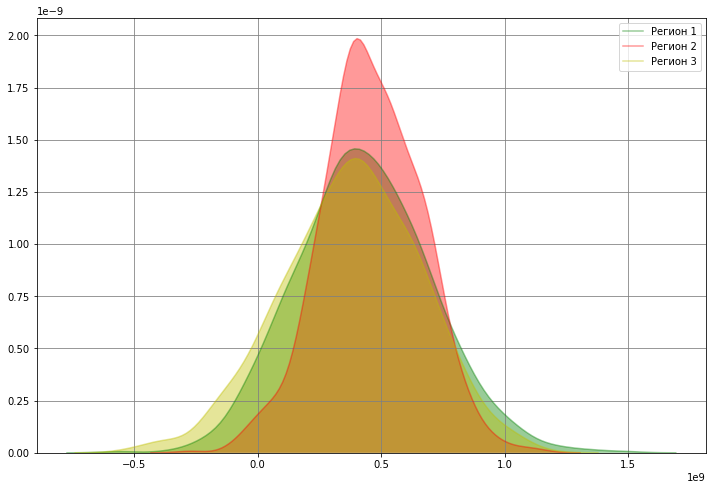

In [ ]:
plt.figure(figsize=(12,8))
sns.kdeplot(values_1, shade=True, color="g", label="Регион 1", alpha=.4)
sns.kdeplot(values_2, shade=True, color="r", label="Регион 2", alpha=.4)
sns.kdeplot(values_3, shade=True, color="y", label="Регион 3", alpha=.4)
plt.legend()
plt.grid(color='grey')
plt.show()

### Расчет рисков

Функция для расчета доли отрицательной прибыли по выбранным скважинам и предсказаниям модели:

In [ ]:
def risks(values):
    values=pd.Series(values)
    val_minus=values[values < 0].count()
    val=values.count()
    return ((val_minus/val)*100)

Отобразим все значения в таблице:

In [ ]:
pd.DataFrame({'region_1': (risks(values_1)),'region_2': (risks(values_2)),'region_3': (risks(values_3))},
             index=['доля убыточных распределений, %'])

,region_1,region_2,region_3
"доля убыточных распределений, %",5.1,1.3,9.1


**Вывод**

По графику и полученной таблице можно сделать вывод, что наименьший риск убытка для разработки местораждения во `2 регионе`. В 95%-ом доверительном интервале 2-й регион единственный, где нет риска убытка.

Наименьший риск убыточности во втором регионе (1.3%), что лишний раз потверждает наш выбор.

Также там наблюдается наибольшая средняя прибыль.

**Общий вывод**

Данные по регионам были загружены и проанализированы. 

Для разбиения данных использовал функции, так как это упращает работу с несколькими таблицами.

Были рассмотрены 3 модели и их метрики качества. Наилучший результат показало лес решений, но время обучения модели оказалось очень большим. Дерово решений обучалось гораздо быстрее, но результаты были похуже. Хуже всего показала себя логистическая регрессия.

Было посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки. Он составиляет 112 тонн барреля.

Проведена процедура Bootstrap, в ходе которого определили, что 2 регион является наименее рискованый для разработки скважин.